# Gradient descent on linear model


In [2]:
## import the necessary packages
import numpy as np
import matplotlib.pyplot as plt


## functions to plot linear model and compute cost


In [3]:
## plots just the datapoints, in a scatter plot
def plot_datapoints(x,y):
    """
    x and y are arrays of numbers
    makes a scatter plot of the x,y datapoints
    """
    
    # draw a scatter plot of 
    plt.scatter(x, y, marker='o', c='r')
    plt.title("some data")
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    #plt.show()


In [4]:
## plots the datapoints in a scatter plot, together with a linear model for provided parameters w, b
def plot_linear_model(x,y,w,b):
    """
    x and y are equal-length arrays of data points
    w and b are the parameters of the linear model y_hat = wx + b
    plots the linear model together with a scatter plot of the datapoints
    """    

    ## get the number of data points in x,y train
    m = x.shape[0]

    ## create a zero-filled array of length m for our y-hat predictions
    y_hats = np.zeros(m)

    ## now for each x value compute the predicted y-hat value
    for i in range(m):
        y_hats[i] = w*x[i] + b

    ## now we can plot the model prediction, which will
    ## be x_train versus y_hats

    plt.plot(x, y_hats, c='b', label='prediction')

    ## and plot the data points for comparison
    plt.scatter(x, y, marker='o', c='r', label='actual data' )
    plt.title("prediction vs data")
    plt.xlabel("x axis")
    plt.ylabel("y axis")

    plt.legend(loc="upper left")
    plt.show()    # doesn't seem to be necessary

In [5]:
## computes the cost for a given linear model w, b
def compute_cost(x,y,w,b):
    """
    x and y are equal-length arrays of numbers, defining data points
    w and b are the parameters of the linear model
    """
    m = x.shape[0]

    sum=0.   #here we will accumulate the summed costs

    for i in range(m):
        y_hat = w*x[i]+b   # predicted y
        y_real = y[i]           # actual y

        err2 = (y_hat - y_real)**2  # squared error
        sum += err2            # add to accumulated sum

    return sum/(2*m)


## set a plotting style

In [6]:
# this shows the available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [7]:
# pick one of the above styles 
plt.style.use('classic')

## provide data points

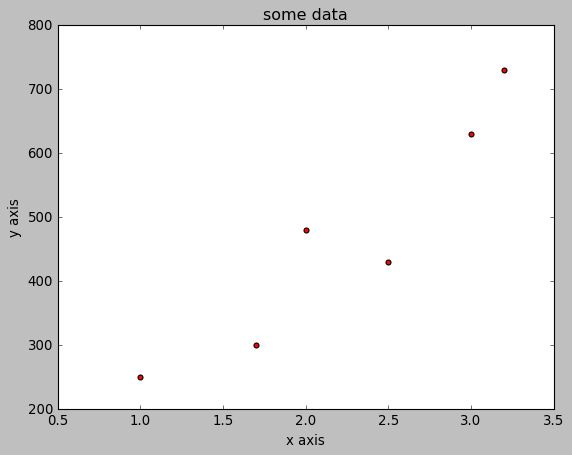

In [8]:
## set up the data points (these are values from week 1 lecture)
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

## visualize them in a scatter plot
plot_datapoints(x_train, y_train)

## data with w,b linear model

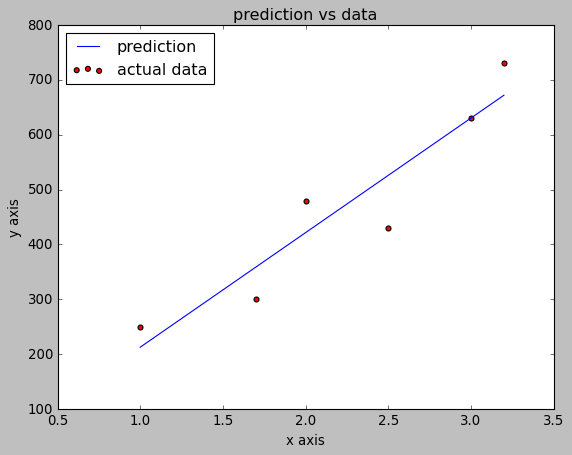

cost = 1736


In [58]:
## pick some values for the model parameters
w_fixed = 208.8
b_fixed = 3.8

# w_fixed = 250
# b_fixed = -100

plot_linear_model(x_train,y_train, w_fixed, b_fixed)

## and let's compute the cost of this w,b model
c = compute_cost(x_train, y_train, w_fixed, b_fixed)    # compute its cost
print(f"cost = {round(c)}")

## Visualize cost function

Set the range of w values and b values that we want to use for this section

In [10]:
# set b_train and w_train, the range of values that we want to use
w_train = np.array([i for i in range(50, 350, 25)])
b_train = np.array([i for i in range(-40, 200, 20)])


### Plots of w versus cost, for fixed values of b

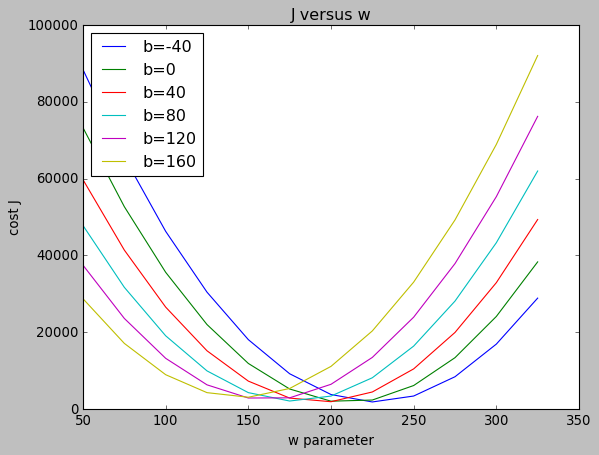

In [11]:
## function to plot cost J vs w  for a provided value of b
def cost_versus_w(x,y,bval):
    """plots cost J versus w for a provided value of b
    """
    m = w_train.shape[0]
    J_train = np.zeros(m)

    for i in range(m):
        # use provided value of b, vary only the w value
        J_train[i] = compute_cost(x,y,w_train[i], bval)

    plt.plot(w_train, J_train, label=f"b={bval}")
    

## call cost versus w for different values of b
for bval in [-40, 0, 40, 80, 120, 160]:  # don't use btrain as it has too many values
    cost_versus_w(x_train, y_train, bval)  
plt.title("J versus w")
plt.xlabel("w parameter")
plt.ylabel("cost J")
plt.legend(loc="upper left")

### 3D scatter plot of w,b versus cost

Text(0.5, 0, 'b parameter')

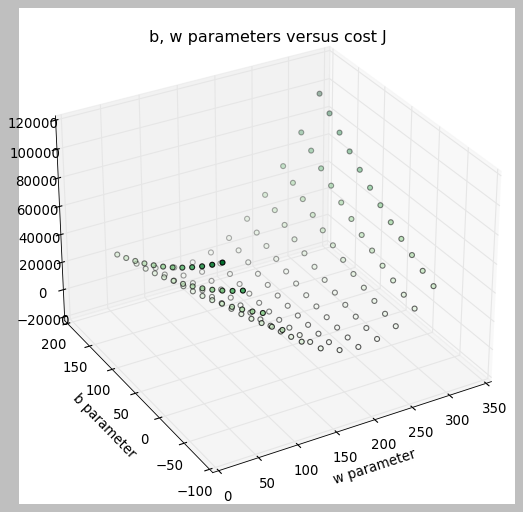

In [21]:
## we use the w_train and b_train defined at the top of this section
## and the x_train, y_train datapoints defined at the top of the notebook

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

m = len(w_train)*len(b_train)   # number of J-points to plot

# empty array for three axes
W = np.zeros(m)
B = np.zeros(m)
J = np.zeros(m)

# compute values for axis arrays
i=0
for w in w_train:
    for b in b_train:
        W[i] = w
        B[i] = b
        J[i] = compute_cost(x_train, y_train, w, b)  
        i += 1


ax.scatter3D(W, B, J, c=J, cmap='Greens')
# ax.view_init(30, 35)

ax.view_init(30, -120) # to get the w parameter to increase rather than decrease moving away from front

plt.title("b, w parameters versus cost J")
plt.xlabel("w parameter")
plt.ylabel("b parameter")

#plt.show()

### 3d surface plot of w,b versus cost

Text(0.5, 0, 'b parameter')

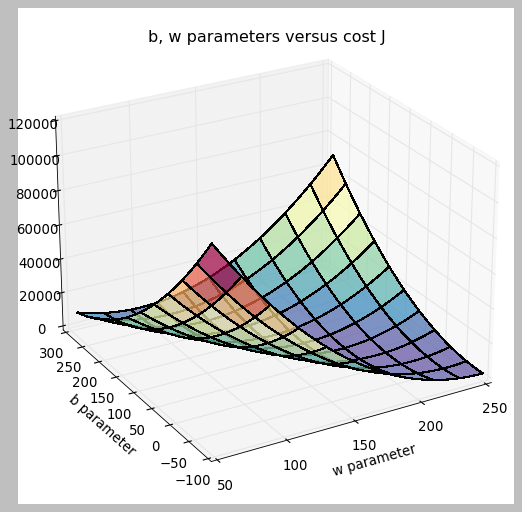

In [27]:
## as before set up the figure and the 3d axes
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

#Useful linearspaces to give values to the parameters w and b
wspace = np.linspace(50, 250, 100)   # start, stop, num (where num is the number of evenly spaced values we want)
bspace = np.linspace(-100, 280, 100)

## but now we need to create a MESHGRID for the inputs
W,B = np.meshgrid(wspace, bspace)

## compute all the values in one shot
J = compute_cost(x_train, y_train, W, B)

## draw the plot

#ax.contour3D(W, B, J, 50, cmap='Greens')
ax.plot_surface(W, B, J, cmap = "Spectral_r", alpha=0.7, antialiased=False)
#ax.plot_wireframe(W, B, J, color="black")

ax.view_init(25, -120)

plt.title("b, w parameters versus cost J")
plt.xlabel("w parameter")
plt.ylabel("b parameter")

## functions to compute gradient and update parameters


The cost function for the w,b linear model is given by:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{1}$$ 
where $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$ 

The gradient is given by the partial derivatives with respect to $w$ and $b$ respectively, ie, substituting (2) into (1):

$$\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum\limits_{i = 0}^{m-1} [ w(x^{(i)}) + b - y^{(i)} ]x^{(i)}\tag{3} $$
$$ \frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum\limits_{i = 0}^{m-1} [ w(x^{(i)}) + b - y^{(i)} ]\tag{4}

$$

In [35]:
## compute the two partial derivates to give the gradient with respect to w and b
def compute_gradient(x,y,w,b):
    """
    x and y are arrays defining the datapoints, w and b are the model parameters
    
    returns a tuple, (dJ_dw, dJ_db), the partial derivatives with respect to w and b
    """
    #number of datapoints
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        val = w*x[i] + b - y[i]
        dj_dw += val*x[i]
        dj_db += val

    dj_dw = (1/m)*dj_dw
    dj_db = (1/m)*dj_db

    return dj_dw, dj_db


# With the two partial derivatives we can now implement gradient descent, where we update w and b (simultaneously) as follows:
# w_new = w - alpha * dj_dw
# b_new = b - alpha * dj_db
# where alpha is the learning rate

def update_parameters(x, y, alpha, w, b):
    """
    x, y are arrays defining the data points to use, alpha is the learning rate
    w and b are the current model parameters, that we want to update

    returns a tuple (w_new, b_new), the new values of the model parameters 
    """

    ## get the gradient at w,b
    dj_dw, dj_db = compute_gradient(x, y, w, b)

    w_new = w - alpha*dj_dw
    b_new = b- alpha*dj_db

    return w_new, b_new

## run gradient descent to get optimal w, b

converged at iteration 145 with parameters (208.77123761607, 3.784854745239803)
[(0, 0), (351.0, 141.0), (21.7, 4.5), (333.5, 129.6), (41.1, 8.3), (318.0, 119.2), (58.4, 11.4), (304.3, 109.8), (73.9, 14.0), (292.3, 101.3), (87.6, 16.1), (281.6, 93.5), (100.0, 17.8), (272.3, 86.5), (111.0, 19.1), (264.0, 80.0), (120.8, 20.1), (256.7, 74.2), (129.6, 20.9), (250.3, 68.8), (137.5, 21.4), (244.7, 63.9), (144.5, 21.8), (239.8, 59.4), (150.8, 21.9), (235.4, 55.3), (156.5, 22.0), (231.6, 51.5), (161.6, 21.9), (228.3, 48.1), (166.1, 21.7), (225.4, 44.9), (170.2, 21.4), (222.9, 41.9), (173.9, 21.0), (220.6, 39.2), (177.1, 20.6), (218.7, 36.8), (180.1, 20.2), (217.0, 34.5), (182.8, 19.7), (215.6, 32.4), (185.2, 19.2), (214.3, 30.4), (187.3, 18.7), (213.2, 28.6), (189.3, 18.2), (212.3, 26.9), (191.0, 17.6), (211.5, 25.3), (192.6, 17.1), (210.8, 23.9), (194.0, 16.5), (210.2, 22.6), (195.3, 16.0), (209.7, 21.3), (196.5, 15.4), (209.3, 20.2), (197.6, 14.9), (208.9, 19.1), (198.5, 14.4), (208.6, 18.1)

Text(0, 0.5, 'b parameters')

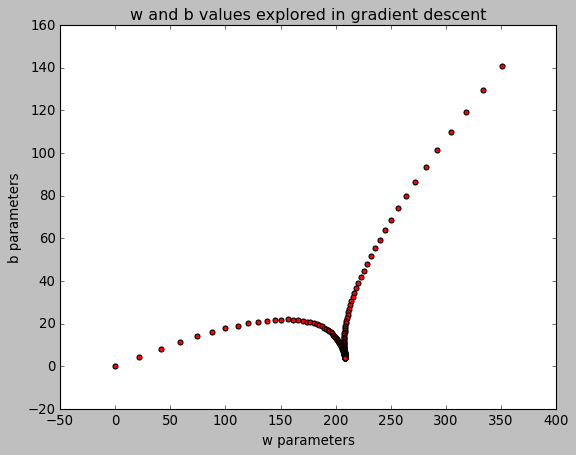

In [90]:
## we'll use the x_train and y_train datapoints defined in the provide datapoints section

## set a learning rate alpha and the number of iterations
alpha = 0.3
iterations = 300

#initialize both parameters to zero
w,b = 0,0 

costs = []  # store the history of the cost
params = []  # store the history of the parameters

for i in range(iterations):


    params.append( (round(w,1), round(b,1)) )  # store the parameters and their attendant cost
    J = compute_cost(x_train, y_train, w, b)
    costs.append(round(J,1))


    w, b = update_parameters(x_train, y_train, alpha, w, b)

    if ( round(w,1), round(b,1) ) == params[-1]:
        print(f"converged at iteration {i} with parameters {w,b}")
        break
        

print(params)
print(costs)

print(f"last params are {params[-1]}")
print(f"with cost {costs[-1]}")


## plot the evolution of the parameters
## split the tuples into trains for the two axes 
w_params = [p[0] for p in params] 
b_params = [p[1] for p in params]


# draw a scatter plot of them
plt.scatter(w_params, b_params, marker='o', c='r')
plt.title("w and b values explored in gradient descent")
plt.xlabel("w parameters")
plt.ylabel("b parameters")


Text(0, 0.5, 'cost')

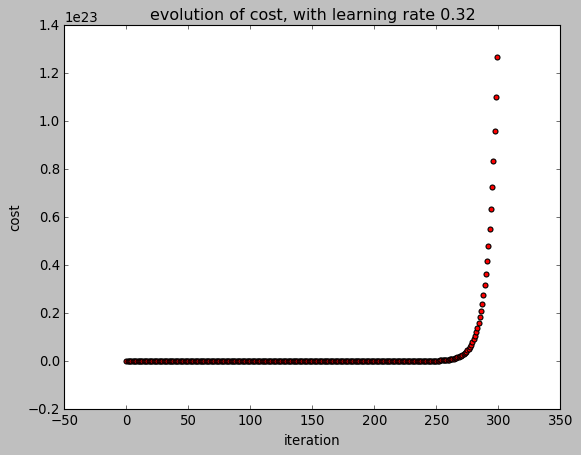

In [89]:
## now also show how J evolved over the iterations


iterations = [i for i in range(len(costs))]

# draw a scatter plot of them
plt.scatter(iterations, costs, marker='o', c='r')
plt.title(f"evolution of cost, with learning rate {alpha}")
plt.xlabel("iteration")
plt.ylabel("cost")